In [5]:
#import packages
import numpy as np
import pandas as pd
import scipy.stats as sps
import yfinance as yf
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


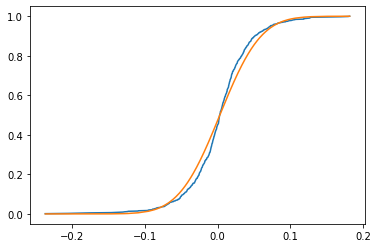

normal distribution does not fit the data: p-value 0.0245


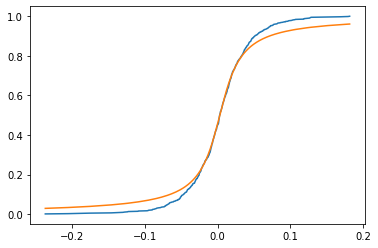

Cauchy distribution fits the data: p-value 0.1194


In [41]:
ticker = 'TSLA'
start = '2019-10-31'
end = '2022-10-31'
#retrieve data
prices = np.array(yf.download(ticker, start, end)['Close'])
#calculate returns
returns = np.log(prices[1:]/prices[:-1])
#sort returns
returns = np.sort(returns)
#construct empirical distribution function
edf = np.arange(1, len(returns)+1)/len(returns)
#construct normal distribution function
mean = np.average(returns)
std = np.std(returns)
normal_cdf = sps.norm.cdf(returns, mean, std)
#plot the distribution functions
plt.plot(returns, edf)
plt.plot(returns, normal_cdf)
plt.show()
#apply the Kolmogorov-Smirnov test
p_value = np.exp(-max(abs(edf - normal_cdf))**2*len(returns))
if p_value < 0.1:
    print('normal distribution does not fit the data: p-value '+str(round(p_value, 4)))
else:
    print('normal distribution fits the data: p-value '+str(round(p_value, 4)))
#construct cauchy distribution function
median = np.quantile(returns, 0.5)
iq_range = (np.quantile(returns, 0.75) - np.quantile(returns, 0.25))/2
cauchy_cdf = 1/np.pi*np.arctan((returns - median)/iq_range) + 1/2
#plot the distribution functions
plt.plot(returns, edf)
plt.plot(returns, cauchy_cdf)
plt.show()
#apply the Kolmogorov-Smirnov test
p_value = np.exp(-max(abs(edf - cauchy_cdf))**2*len(returns))
if p_value < 0.1:
    print('Cauchy distribution does not fit the data: p-value '+str(round(p_value, 4)))
else:
    print('Cauchy distribution fits the data: p-value '+str(round(p_value, 4)))